In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc, precision_recall_curve, average_precision_score

In [3]:
data = pd.read_csv("datasets/diabetes_dataset.csv")
data.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [4]:
x = data.iloc[:,:30]
x.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,239,41,160,145,136,236,6.36,8.18,29.6,Type 2
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,116,55,50,30,93,150,2.00,5.63,23.0,No Diabetes
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,213,66,99,36,118,195,5.07,7.51,44.7,Type 2
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,171,50,79,140,139,253,5.28,9.03,38.2,Type 2
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,210,52,125,160,137,184,12.74,7.20,23.5,Type 2


In [5]:
y = data.iloc[:,30]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: diagnosed_diabetes, dtype: int64

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train_encoded = pd.get_dummies(x_train, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, drop_first=True)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)

In [8]:
model = SVC(kernel='rbf',C=1.0,gamma = "scale",decision_function_shape="ovr")
model.fit(x_train_scaled,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
y_pred = model.predict(x_test_scaled)


In [10]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df[df["Actual"]!=df["Predicted"]].count()

Actual       13
Predicted    13
dtype: int64

In [11]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.99935


In [15]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 8070     7]
 [    6 11917]]


In [14]:
classRoport = classification_report(y_test,y_pred)
print(classRoport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8077
           1       1.00      1.00      1.00     11923

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



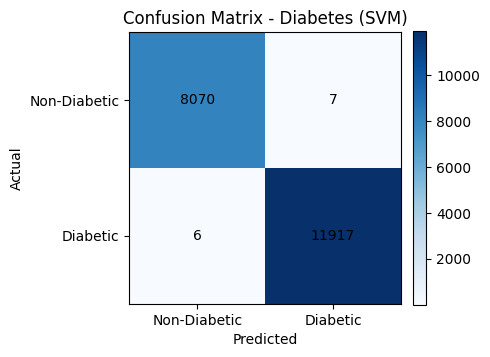

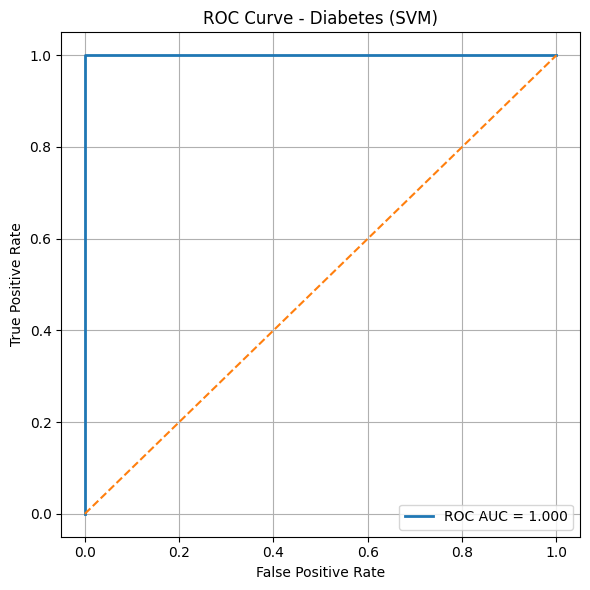

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(cm, cmap='Blues')
ax.set_title('Confusion Matrix - Diabetes (SVM)')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
ax.set_yticklabels(['Non-Diabetic', 'Diabetic'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center')

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


scores = model.decision_function(x_test_scaled)
fpr, tpr, _ = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Diabetes (SVM)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

